In [1]:
import sys
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import shutil
from IPython.display import clear_output

In [2]:
with open('C://Austin//Projects//MS_Thesis_Data//first_review_postposeest.pickle', 'rb') as handle:
    complete_pose_est_dict = pickle.load(handle)

df = pd.DataFrame(complete_pose_est_dict)
df.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\anaconda3\envs\ms_thesis_Env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\anaconda3\envs\ms_thesis_Env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075

,img_arr,frame,angle,content_source,character_name,og_img,folder_path,pose_keypoints,pose_annotations,Round1_PoseEst_Completion
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,full,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[70.33253 34.06229 0.83968675], [77....",[<openpifpaf.decoder.annotation.Annotation obj...,3
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([], [])",[],-1
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,side,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[26.429058 54.45409 0.5765964], [32.224...",[<openpifpaf.decoder.annotation.Annotation obj...,3
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[61.584763 77.56881 0.7112104], [75.066...",[<openpifpaf.decoder.annotation.Annotation obj...,3
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,full,back,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...",[<openpifpaf.decoder.annotation.Annotation obj...,0


In [3]:
def extract_from_skele(img, frame, keypoints, completion):
    out_arr = {}
    point_titles = ["face"
            ,"left_eye"
            ,"right_eye"
            ,"left_ear"
            ,"right_ear"
            ,"left_shoulder"
            ,"right_shoulder"
            ,"left_elbow"
            ,"right_elbow"
            ,"left_wrist"
            ,"right_wrist"
            ,"left_hip"
            ,"right_hip"
            ,"left_knee"
            ,"right_knee"
            ,"left_ankle"
            ,"right_ankle"]
    
    #reformat to if completion>0:
    if completion==1:
        pass
    elif completion==2:
        pass
    elif completion==3:
        i=-1
        for point in keypoints:
            i=i+1
            if point[0]!=0:
                if i == 0:
                    bound = 15
                elif i<=4:
                    bound = 10  
                else:
                    bound = 20
                cropped_img = np.array(img)
                cropped_img = cropped_img[int(np.floor(point[1]-bound)):int(np.ceil(point[1]+bound)),
                                        int(np.floor(point[0]-bound)):int(np.ceil(point[0]+bound))]
                out_arr[point_titles[i]]=cropped_img

        neck_base = keypoints[5]
        bound = min(neck_base[0:2])
        cropped_img = np.array(img)
        cropped_img = cropped_img[:int(np.ceil(neck_base[1])),
                                int(np.floor(neck_base[0]-bound)):int(np.ceil(neck_base[0]+bound))]
        out_arr["head"]=cropped_img

        cropped_img = np.array(img)
        #Need to check for most extreme height 
        l_arm = [keypoints[5], keypoints[7], keypoints[9]]
        r_arm = [keypoints[6], keypoints[8], keypoints[10]]

        l_x = [x[0] for x in l_arm]
        l_y = [x[1] for x in l_arm]

        r_x = [x[0] for x in r_arm]
        r_y = [x[1] for x in r_arm]

        if frame == "front":
            l_cropped_img = cropped_img[int(min(l_y)-10):int(max(l_y)+30), int(min(l_x)):]
            r_cropped_img = cropped_img[int(min(r_y)-10):int(max(r_y)+30), :int(max(r_x))]
        elif frame == "back":
            l_cropped_img = cropped_img[int(min(l_y)-10):int(max(l_y)+30), :int(max(l_x))]
            r_cropped_img = cropped_img[int(min(r_y)-10):int(max(r_y)+30), int(min(r_x)):]

        out_arr["left_arm"] = l_cropped_img
        out_arr["right_arm"] = r_cropped_img

        torso = [keypoints[6], keypoints[5], keypoints[12], keypoints[11]]

        tor_x = [x[0] for x in torso]
        tor_y = [x[1] for x in torso] 
        
        cropped_img = cropped_img[int(min(tor_y)-10):int(max(tor_y)+10),
                                int(min(tor_x)-10):int(max(tor_x)+10)]

        out_arr["torso"] = cropped_img

        cropped_img = np.array(img)
        l_leg = keypoints[11]
        r_leg = keypoints[12]
        if frame == "front":
            l_cropped_img = cropped_img[int(np.floor(l_leg[1]-15)):, int(np.floor(l_leg[0]-15)):]
            r_cropped_img = cropped_img[int(np.floor(r_leg[1]-15)):, :int(np.floor(r_leg[0]+15))] 
        elif frame == "back":
            l_cropped_img = cropped_img[int(np.floor(l_leg[1]-15)):, :int(np.floor(l_leg[0]+15))]
            r_cropped_img = cropped_img[int(np.floor(r_leg[1]-15)):, int(np.floor(r_leg[0]-15)):]

        out_arr["left_leg"] = l_cropped_img
        out_arr["right_leg"] = r_cropped_img

        return out_arr
        


In [10]:
out = extract_from_skele(img, "front", complete_pose_est_dict["pose_keypoints"][i][0][0], complete_pose_est_dict["Round1_PoseEst_Completion"][i])

In [47]:
for key in out:
    print(key)

face
left_eye
right_eye
right_ear
left_shoulder
right_shoulder
left_elbow
right_elbow
left_wrist
right_wrist
left_hip
right_hip
left_knee
right_knee
left_ankle
right_ankle
head
left_arm
right_arm
torso
left_leg
right_leg


right_leg


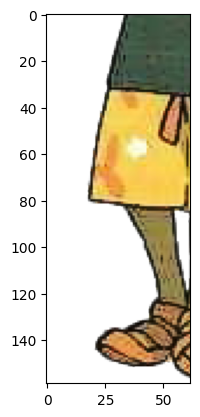

In [12]:
for key in out:
        clear_output(wait=True)
        print(key)
        plt.imshow(out[key])
        plt.show()
        input()

In [ ]:
""" Bounds
0 = 20 - Face
1 - 4 = 10
5 - 10 = 15
5/6 = Full Head Range
5,9 | 6,10 = Full Arm
11, 12 = Full Leg Range (15)
5,6 - 1,12 = Full Torso Range
13, 14 = 30
15, 16 = Full Feet Range (10)
"""

In [4]:
"""
0 nose
1 left_eye
2 right_eye
3 left_ear
4 right_ear
5 left_shoulder
6 right_shoulder
7 left_elbow
8 right_elbow
9 left_wrist
10 right_wrist
11 left_hip
12 right_hip
13 left_knee
14 right_knee
15 left_ankle
16 right_ankle
"""

'\n0 nose\n1 left_eye\n2 right_eye\n3 left_ear\n4 right_ear\n5 left_shoulder\n6 right_shoulder\n7 left_elbow\n8 right_elbow\n9 left_wrist\n10 right_wrist\n11 left_hip\n12 right_hip\n13 left_knee\n14 right_knee\n15 left_ankle\n16 right_ankle\n'

In [ ]:
"""
associations
 0: left_ankle      --> left_knee
 1: left_knee       --> left_hip
 2: right_ankle     --> right_knee
 3: right_knee      --> right_hip
 4: left_hip        --> right_hip
 5: left_shoulder   --> left_hip
 6: right_shoulder  --> right_hip
 7: left_shoulder   --> right_shoulder
 8: left_shoulder   --> left_elbow
 9: right_shoulder  --> right_elbow
10: left_elbow      --> left_wrist
11: right_elbow     --> right_wrist
12: left_eye        --> right_eye
13: nose            --> left_eye
14: nose            --> right_eye
15: left_eye        --> left_ear
16: right_eye       --> right_ear
17: left_ear        --> left_shoulder
18: right_ear       --> right_shoulder
"""

In [8]:
# - i=26 Third pose Burnet
# - = 28 Back pose Hau
# - = 52 Prof Sycmore Side
i=26

27
3


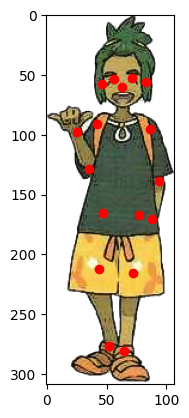

In [9]:
i=i+1
print(i)
print(complete_pose_est_dict["Round1_PoseEst_Completion"][i])

img = complete_pose_est_dict["img_arr"][i]

plt.imshow(img)
#print(complete_pose_est_dict["pose_keypoints"][i][0][0])
x_points = [x[0] for x in complete_pose_est_dict["pose_keypoints"][i][0][0]]
y_points = [x[1] for x in complete_pose_est_dict["pose_keypoints"][i][0][0]]
plt.scatter(x_points,y_points, c="red")
plt.show()

ye


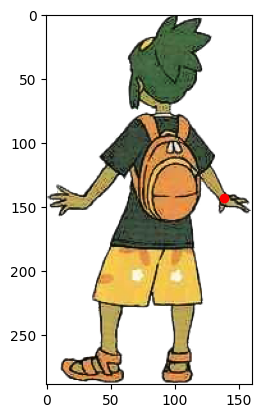

In [11]:
n = 10
plt.imshow(img)
points = complete_pose_est_dict["pose_keypoints"][i][0][0][n]
if points.shape[0]:
    print("ye")
plt.scatter(points[0],points[1], c="red")
plt.show()

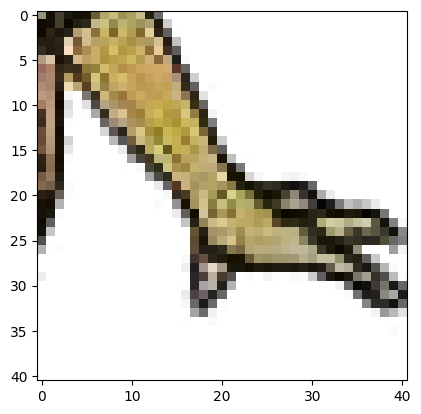

In [12]:
bound = 20

cropped_img = np.array(img)
cropped_img = cropped_img[int(np.floor(points[1]-bound)):int(np.ceil(points[1]+bound)),
                          int(np.floor(points[0]-bound)):int(np.ceil(points[0]+bound))]
plt.imshow(cropped_img)

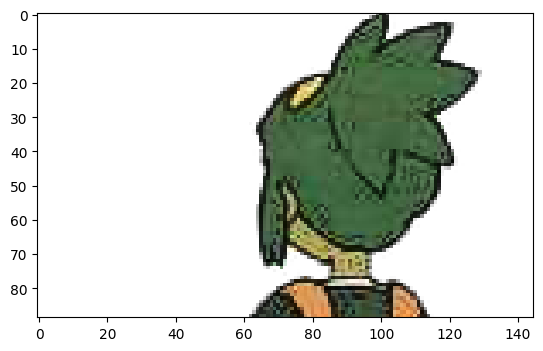

In [13]:
# Full Head
neck_base = complete_pose_est_dict["pose_keypoints"][i][0][0][5]
bound = min(neck_base[0:2])
cropped_img = np.array(img)
cropped_img = cropped_img[:int(np.ceil(neck_base[1])),
                          int(np.floor(neck_base[0]-bound)):int(np.ceil(neck_base[0]+bound))]
plt.imshow(cropped_img)

[array([72.03566  , 88.68302  ,  0.8272901], dtype=float32), array([ 51.93484   , 117.65775   ,   0.84971285], dtype=float32), array([ 32.72343, 144.68538,   1.     ], dtype=float32)]


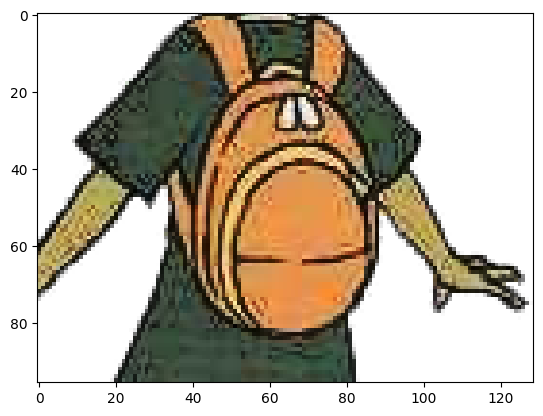

In [14]:
cropped_img = np.array(img)
#Need to check for most extreme height 
l_arm = [complete_pose_est_dict["pose_keypoints"][i][0][0][5], complete_pose_est_dict["pose_keypoints"][i][0][0][7],
        complete_pose_est_dict["pose_keypoints"][i][0][0][9]]
r_arm = [complete_pose_est_dict["pose_keypoints"][i][0][0][6], complete_pose_est_dict["pose_keypoints"][i][0][0][8],
         complete_pose_est_dict["pose_keypoints"][i][0][0][10]]
print(l_arm)
l_x = [x[0] for x in l_arm]
l_y = [x[1] for x in l_arm]

r_x = [x[0] for x in r_arm]
r_y = [x[1] for x in r_arm]

l_cropped_img = cropped_img[int(min(l_y)-10):int(max(l_y)+30),
                          int(min(l_x)):] # :int(min(l_x)) - if back frame
r_cropped_img = cropped_img[int(min(r_y)-10):int(max(r_y)+30),
                          :int(max(r_x))] # int(max(r_x)): - if back frame
plt.imshow(l_cropped_img)

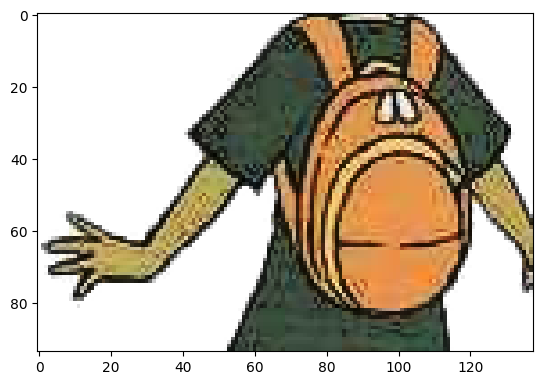

In [15]:
plt.imshow(r_cropped_img)

(289, 161, 4)
[np.float32(107.67107), np.float32(72.03566), np.float32(101.99309), np.float32(72.22017)]
[np.float32(88.3302), np.float32(88.68302), np.float32(170.2062), np.float32(168.96637)]
(102, 55, 4)


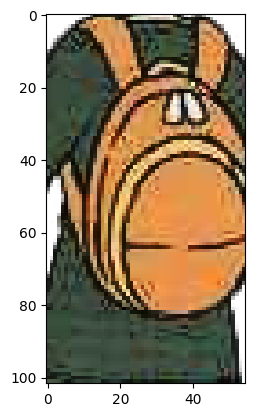

In [16]:
cropped_img = np.array(img)
print(cropped_img.shape)
torso = [complete_pose_est_dict["pose_keypoints"][i][0][0][6], complete_pose_est_dict["pose_keypoints"][i][0][0][5],
         complete_pose_est_dict["pose_keypoints"][i][0][0][12], complete_pose_est_dict["pose_keypoints"][i][0][0][11]]

tor_x = [x[0] for x in torso]
tor_y = [x[1] for x in torso] 

#Need to add code to check which points are extremes (max width and max height)
#cropped_img = cropped_img[int(torso[0][1]-10):int(torso[2][1]+10),
#                          int(torso[0][0]-10):int(torso[1][0]+10)]

print(tor_x)
print(tor_y)

# if frame = back:
cropped_img = cropped_img[int(min(tor_y)-10):int(max(tor_y)+10),
                          int(min(tor_x)-10):int(max(tor_x)+10)]

print(cropped_img.shape)
plt.imshow(cropped_img)

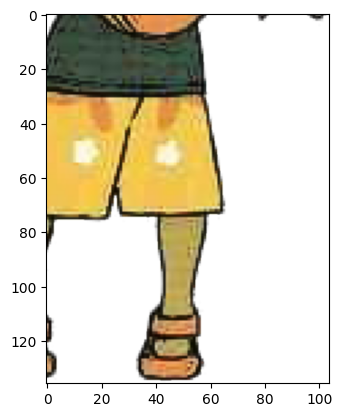

In [17]:
keypoints = complete_pose_est_dict["pose_keypoints"][i][0][0]
bound = 15
cropped_img = np.array(img)
l_leg = keypoints[11]
cropped_img = cropped_img[int(np.floor(l_leg[1]-bound)):,
                          int(np.floor(l_leg[0]-bound)):] #:int(np.floor(l_leg[0]+bound)) for back frame
plt.imshow(cropped_img)

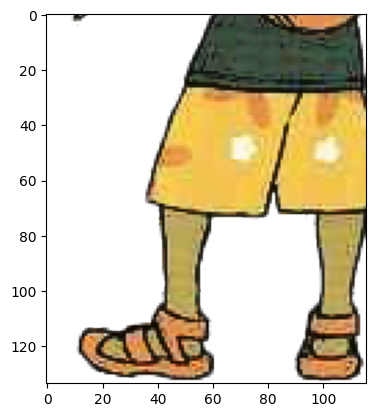

In [18]:
bound = 15
cropped_img = np.array(img)
r_leg = complete_pose_est_dict["pose_keypoints"][i][0][0][12]
cropped_img = cropped_img[int(np.floor(r_leg[1]-bound)):,
                          :int(np.floor(r_leg[0]+bound))] #int(np.floor(r_leg[0]-bound)): - for back frame
plt.imshow(cropped_img)